In [64]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

processor_dnd = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model_dnd = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [139]:
# import requests
# from PIL import Image
# from transformers import BlipProcessor, BlipForQuestionAnswering

# processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
# model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

In [65]:
from modeling_dandelin import VQADandelin

vqa_model = VQADandelin()

2 0.9300311803817749


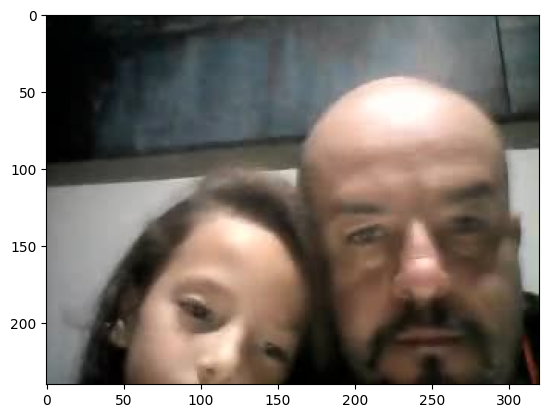

In [237]:
import torch
import matplotlib.pyplot as plt
# prepare image + question
# frame_path = "/home/ajeet/codework/dataset_frames/2649876/0_2351.jpg"
frame_path = "/home/ajeet/codework/dataset_frames/2565397/0_1337.jpg"
# frame_path = "/home/ajeet/codework/dataset_frames/2603060/0_102.jpg"
# frame_path = "/home/ajeet/codework/dataset_frames/2602597/0_1109.jpg"
image = Image.open(frame_path)
plt.imshow(image)
# text = "How many people are in the picture?"
text = "How many people are there?"
# text = "How many persons are there?"

# text = "How many people's faces are there?"
# text = "How many persons' faces are there?"

with torch.no_grad():
    encoding = processor_dnd(image, text, return_tensors="pt")
    outputs = model_dnd(**encoding)
logits = outputs.logits

# Get the predicted answer and probability
probs = torch.softmax(logits, dim=-1)
max_prob, idx = torch.max(probs, dim=-1)

logits = outputs.logits
idx = logits.argmax(-1).item()

# return self.model.config.id2label[idx], max_prob.item()

print(model_dnd.config.id2label[idx], max_prob.item())

In [189]:

vqa_label, vqa_prob = vqa_model.classify(frame_path, text)
print(vqa_label, vqa_prob)

single_person 0.9085127711296082


In [143]:
outputs

BlipTextVisionModelOutput(loss=tensor(3.9492), image_embeds=tensor([[[-0.0027,  0.6334, -1.1360,  ...,  0.0525,  0.9760, -0.3111],
         [ 0.9454, -0.6763, -0.3562,  ..., -0.3817,  1.0188, -0.4284],
         [ 0.2031, -0.2298, -0.4418,  ..., -0.8684,  0.8929, -0.2545],
         ...,
         [ 0.6353,  0.3097, -0.4191,  ..., -0.8417,  0.1550,  0.1457],
         [-0.1665,  0.1231, -0.2573,  ...,  0.0477,  0.2816, -0.4362],
         [-0.6329,  0.0190, -0.8928,  ..., -0.0711,  0.1031, -0.0191]]]), last_hidden_state=tensor([[[-0.0027,  0.6334, -1.1360,  ...,  0.0525,  0.9760, -0.3111],
         [ 0.9454, -0.6763, -0.3562,  ..., -0.3817,  1.0188, -0.4284],
         [ 0.2031, -0.2298, -0.4418,  ..., -0.8684,  0.8929, -0.2545],
         ...,
         [ 0.6353,  0.3097, -0.4191,  ..., -0.8417,  0.1550,  0.1457],
         [-0.1665,  0.1231, -0.2573,  ...,  0.0477,  0.2816, -0.4362],
         [-0.6329,  0.0190, -0.8928,  ..., -0.0711,  0.1031, -0.0191]]]), hidden_states=None, attentions=None)

In [1]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

# you can specify the revision tag if you don't want the timm dependency
processor_fc = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50", revision="no_timm")
model_fc = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50", revision="no_timm")


/home/ajeet/codework/venv_visionwork/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open("/home/ajeet/codework/dataset_frames/2648356/0_460.jpg")

with torch.no_grad():
        inputs = processor_fc(images=image, return_tensors="pt")
        outputs = model_fc(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor_fc.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model_fc.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )

Detected person with confidence 0.964 at location [72.67, 12.03, 309.01, 178.83]


In [15]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests
import time


yolo_model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
yolo_image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

In [19]:
yolo_model.config.id2label

{0: 'N/A',
 1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 12: 'N/A',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 26: 'N/A',
 27: 'backpack',
 28: 'umbrella',
 29: 'N/A',
 30: 'N/A',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 45: 'N/A',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',

In [50]:
start_time = time.time()
for i in range(1):
    image = Image.open(f"/home/ajeet/codework/dataset_frames/2572904/0_1941.jpg")
    with torch.no_grad():
        inputs = yolo_image_processor(images=image, return_tensors="pt")
        outputs = yolo_model(**inputs)

    # model predicts bounding boxes and corresponding COCO classes
    logits = outputs.logits
    bboxes = outputs.pred_boxes


    # print results
    target_sizes = torch.tensor([image.size[::-1]])
    results = yolo_image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = [round(i, 2) for i in box.tolist()]
        print(
            f"Detected {yolo_model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
        )
    print("+")

print("Time", time.time() - start_time)

Detected person with confidence 0.977 at location [89.78, 50.52, 318.92, 239.34]
+
Time 0.22488069534301758


In [54]:
from collections import deque 
    
# Declaring deque 
queue = deque(['name','age','DOB'])  
    
print(queue)

deque(['name', 'age', 'DOB'])


In [55]:
queue.append("5")

In [57]:
frame_window = deque(maxlen=3)

In [58]:
frame_window

deque([], maxlen=3)

In [59]:
frame_window.append(5)
frame_window.append(6)
frame_window.append(7)

In [60]:
frame_window

deque([5, 6, 7], maxlen=3)

In [61]:
frame_window.append(10)

In [95]:
frame_window

deque([6, 7, 10], maxlen=3)

In [96]:
a, b, c = frame_window

In [97]:
frame_window

deque([6, 7, 10], maxlen=3)

In [98]:
a

6

In [245]:
from collections import defaultdict

dd = defaultdict(list)  # int() returns 0
dd['key1'] = 10

# Accessing a non-existent key
print(dd['key2'])  # Returns [] instead of raising KeyError


[]


In [246]:
dd

defaultdict(list, {'key1': 10, 'key2': []})

In [242]:
type(dd['key2'])

list

In [254]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2  # y = x^2
y.backward()  # Computes the gradient dy/dx
print(x.grad)  # Output: tensor(4.0) (since dy/dx = 2 * x = 4 when x = 2)


tensor(4.)


In [255]:
import torch

# Create a tensor with requires_grad=True (it tracks operations for gradient computation)
x = torch.tensor(2.0, requires_grad=True)

# Perform some operation
y = x ** 2  # y = x^2

# Detach y from the computation graph
y_detached = y.detach()

# Now y_detached is independent of the computational history of y
print(f"y: {y}, requires_grad: {y.requires_grad}")  # Output: tensor(4., grad_fn=<PowBackward0>)
print(f"y_detached: {y_detached}, requires_grad: {y_detached.requires_grad}")  # Output: tensor(4.) with requires_grad=False

# Perform a new operation on the detached tensor (no gradient tracking)
z = y_detached + 2
print(f"z: {z}, requires_grad: {z.requires_grad}")  # Output: tensor(6.) with requires_grad=False


y: 4.0, requires_grad: True
y_detached: 4.0, requires_grad: False
z: 6.0, requires_grad: False


In [251]:
import torch

# Create tensors with and without requires_grad=True
x = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(3.0)  # requires_grad=False by default

# Check if requires_grad is True or False
print(f"Does x require gradients? {x.requires_grad}")  # Output: True
print(f"Does z require gradients? {z.requires_grad}")  # Output: False


Does x require gradients? True
Does z require gradients? False
